# Economic Data Analysis with Fred and Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '6428d204ced9723da1585a5e5316d06f'


## Create Fred Object

In [2]:
fred = Fred(api_key=fred_key)

## Search Fred

In [8]:
sp_search = fred.search('S&P', order_by='popularity')

In [10]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-03-01,2024-03-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-02-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-01 07:49:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-03-01,2024-03-01,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-02-27 08:14:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-03-01,2024-03-01,S&P 500,2014-03-03,2024-02-29,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-02-29 19:11:00-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-03-01,2024-03-01,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-03-01,2024-03-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-02-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-01 07:49:04-06:00,82,This data represents the effective yield of th...


## Pull Raw Data and Plot

In [20]:
sp500_data = fred.get_series('SP500')

In [21]:
sp500_data

2014-03-03    1845.73
2014-03-04    1873.91
2014-03-05    1873.81
2014-03-06    1877.03
2014-03-07    1878.04
               ...   
2024-02-23    5088.80
2024-02-26    5069.53
2024-02-27    5078.18
2024-02-28    5069.76
2024-02-29    5096.27
Length: 2609, dtype: float64

<Axes: title={'center': 'S&P 500'}>

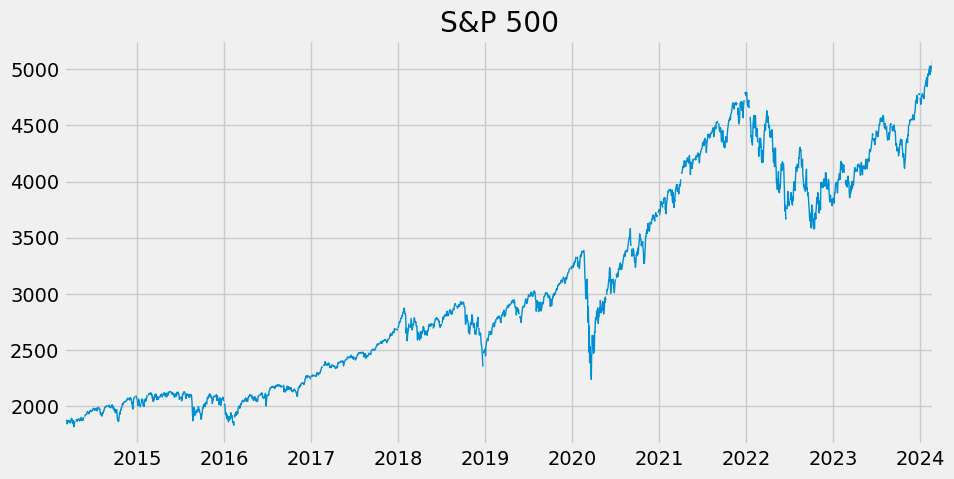

In [25]:
sp500_data.plot(figsize=(10,5), title="S&P 500", lw = 1)

## Pull and Join Multiple Data Sets

In [29]:
fred.search('unemployment').head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-03-01,2024-03-01,Unemployment Rate,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-03-01,2024-03-01,Unemployment Rate,1948-01-01,2024-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-02-02 07:49:06-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-03-01,2024-03-01,Unemployment Level,1948-01-01,2024-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-02-02 07:49:03-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-03-01,2024-03-01,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-03-01,2024-03-01,Continued Claims (Insured Unemployment),1967-01-07,2024-02-17,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-02-29 07:33:05-06:00,74,"Continued claims, also referred to as insured ..."


In [35]:
unrate = fred.get_series('unrate')

In [36]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-09-01    3.8
2023-10-01    3.8
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
Length: 913, dtype: float64

<Axes: title={'center': 'Unemployment Rate'}>

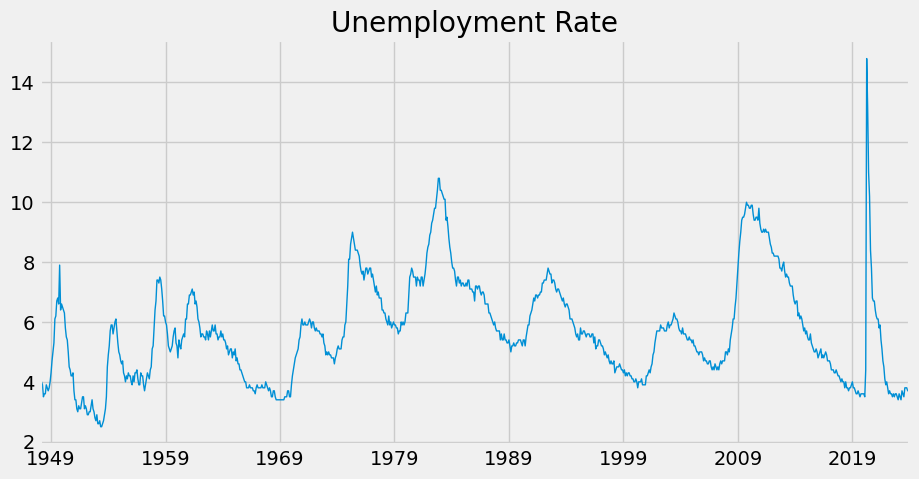

In [43]:
unrate.plot(title="Unemployment Rate", figsize=(10, 5), lw=1)

In [126]:
unemp_df = fred.search('state unemployment', filter=('frequency', 'Monthly'))

In [127]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [128]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [129]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [130]:
pd.concat(all_results, axis=1)

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,TXUR,LNS14000024,M0892BUSM156SNBR,LNS14000031,NYUR,U2RATE,...,CNERUR,LNS14000048,LRUNTTTTUSM156S,CWSTUR,LNS14000026,CNEWUR,LNS14000089,M08311USM156SNBR,LNS14000150,M08320USM156SNBR
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,3.8,5.7,4.7,NaN,4.1,3.5,NaN,5.6,4.0,1.7,...,3.6,3.0,3.8,4.1,3.1,2.7,4.0,NaN,2.1,NaN
2023-10-01,3.8,5.8,4.8,NaN,4.1,3.5,NaN,5.3,4.2,1.9,...,3.7,3.1,3.8,4.2,3.2,2.8,4.2,NaN,2.0,NaN
2023-11-01,3.7,5.8,4.9,NaN,4.1,3.4,NaN,6.3,4.3,1.8,...,3.8,3.1,3.7,4.3,3.1,2.9,3.9,NaN,2.0,NaN
2023-12-01,3.7,5.2,5.1,NaN,4.0,3.4,NaN,4.6,4.5,1.8,...,3.9,3.2,3.7,4.5,3.3,3.1,4.2,NaN,2.1,NaN
